<a href="https://colab.research.google.com/github/karthikchary/data-science-ipython-notebooks/blob/master/Rent_a_Bike_for_Hike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Rent a Bike for Hike !

## Problem Statement

The process of renting bikes has been automated wherein the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



## About the DataSet :

day.csv - bike rentals aggregated on daily basis. Number of Records: 731 days

|Features|Description|
|-----|-----|
|instant| record index|
|season  | season (1:springer, 2:summer, 3:fall, 4:winter)|
|yr | year (0: 2011, 1:2012)|
|mnth | month ( 1 to 12)|
|holiday | weather day is holiday or not(extracted from http://dchr.dc.gov/page/holiday-schedule)|
|weekday | day of the week|
|workingday | if day is neither weekend nor holiday is 1, otherwise is 0.|
|weathersit |1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mi<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
|temp | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)|
|atemp | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)|
|hum | Normalized humidity. The values are divided to 100 (max)|
|windspeed | Normalized wind speed. The values are divided to 67 (max)|
|casual | count of casual users|
|registered| count of registered users|
|cnt | count of total rental bikes including both casual and registered|
 

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the data



In [2]:
df = pd.read_csv('day.csv',header=0)

In [3]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.8 KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


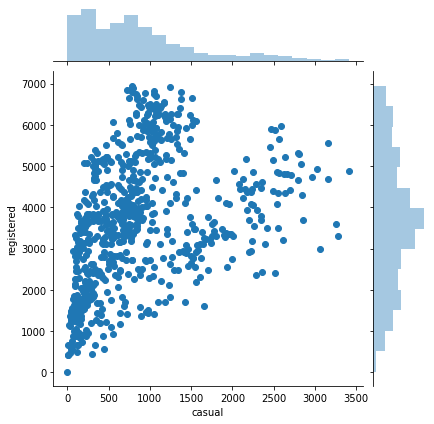

In [7]:
sns.jointplot(x=df.casual,y=df.registered,data=df)
plt.show()

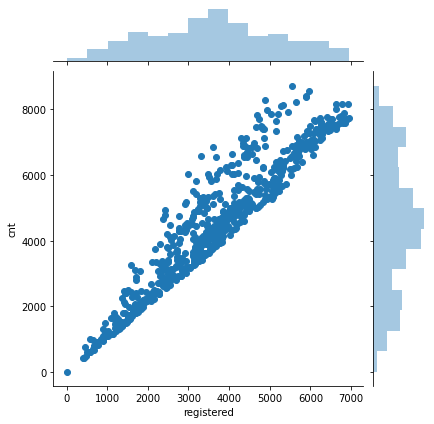

In [9]:
sns.jointplot(x=df.registered,y=df.cnt,data=df)
plt.show()

### Plot the distribution of target variable

### Check the skewness of numerical columns by plotting histograms.

### Remove the skewness from the feature `casual` using a square root transform and plot a histogram to check for the same

### Plot bivariate distribution of target against all  the continous features i.e("temp",	"atemp",	"hum",	"windspeed").

### Plot bivariate distribution of target against all the categorical features i.e("season", "mnth", "holiday", "weekday", "workingday","weathersit").

###  Plot the correlation plot between continous features using heat map

### Drop the column i.e("instant") and then split the Features into predictor and target.
We have dropped the column `instant` because it is the index. 

###  Perform Scaling using MinMaxScaler on the features `casual` and `registered`
Most of the times, the dataset will contain features that are highly varying in magnitudes, units and range.Without normalization the results will vary greatly between different units. So, we need to bring all features to the same level of magnitudes by scaling the features.


### Create a baseline regression model 

### Plot the Residuals
Residuals are defined as the distance between actual and predicted target values. With the help of the histogram, visualize the residuals obtained. 

### Evaluate the above model using error metrics.
Linear Regression error metrics are `RMSE` , `R2_SCORE` , `MAE`.  